In [1]:
### ==> 모듈로딩
import torch
import torch.nn as nn
import cv2
from torchinfo import summary

In [4]:
### ===> 이미지 데이터 준비
filename = '../data/img/flower1.jpg'

In [5]:
### Color 이미지
imgNP = cv2.imread(filename=filename)/255
imgNP.shape, imgNP.ndim

((225, 225, 3), 3)

In [7]:
imgNP2 = cv2.resize(imgNP, (50, 50))
imgNP2.shape, imgNP2.ndim

((50, 50, 3), 3)

In [8]:
### Gray 이미지
grayNP = cv2.imread('../data/img/flower1.jpg', flags=cv2.IMREAD_GRAYSCALE)
grayNP2 = cv2.resize(grayNP, (50, 50))
grayNP2.shape, grayNP2.ndim

((50, 50), 2)

In [20]:
### numpy ===> FloatTensor 변환
colorTensor = torch.FloatTensor(imgNP2)
grayTensor = torch.FloatTensor(grayNP2)

In [14]:
print(f'[color] shape  : {colorTensor.shape}, ndim : {colorTensor.ndim}D')
print(f'[gray] shape  : {grayTensor.shape}, ndim : {grayTensor.ndim}D')

[color] shape  : torch.Size([50, 50, 3]), ndim : 3D
[gray] shape  : torch.Size([50, 50]), ndim : 2D


In [21]:
### Pytorch 이미지 데이터 형식 (C, H, W) ==>
colorTensor = colorTensor.permute(2,0,1)
grayTensor = grayTensor.unsqueeze(dim=0)

print(f'[color] shape  : {colorTensor.shape}, ndim : {colorTensor.ndim}D')
print(f'[gray] shape  : {grayTensor.shape}, ndim : {grayTensor.ndim}D')

[color] shape  : torch.Size([3, 50, 50]), ndim : 3D
[gray] shape  : torch.Size([1, 50, 50]), ndim : 3D


### ===> CNN Layer 살펴보기

In [50]:
### ===> 이미지 데이터로 Conv2D
### [1] 흑백이미지
conLayer = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=5, stride=1, padding=1)
conLayer2 = nn.Conv2d(in_channels=5, out_channels=3, kernel_size=3, stride=1, padding=1)
conLayer

Conv2d(1, 5, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))

In [51]:
output=conLayer(grayTensor)
output.shape

torch.Size([5, 48, 48])

In [52]:
output2=conLayer2(output)
output2.shape

torch.Size([3, 48, 48])

In [53]:
### ===> Pooling Layer : Conv층에서 추출한 특징을 다운샘플링 진행
### 결과 shape : H, W 줄어듬, C는 그대로
pol1 = nn.MaxPool2d(kernel_size=3)
pol2 = nn.MaxPool2d(kernel_size=3, stride=2)

In [58]:
### convXD + AF => F.relu()
relu1 = nn.functional.relu(input=output)

relu2 = nn.functional.relu(input=conLayer2(relu1))
relu1.shape, relu2.shape

(torch.Size([5, 48, 48]), torch.Size([3, 48, 48]))

In [59]:
# 2번째 Conv2D+AF 결과인 피쳐맵 전달
fm1 = pol1(relu2)
fm1.shape

torch.Size([3, 16, 16])

#### 추출된 Feature Map 확인

In [62]:
## 구성 Conv2D+Conv2D+Pooling
print(f'===> [input] {grayTensor.shape}')

output1 = conLayer(grayTensor)
relu1 = nn.functional.relu(input=output1)
print(f'===> [relu1] {relu1.shape}')

output2 = conLayer2(relu1)
relu2 = nn.functional.relu(input=output2)
print(f'===> [relu2] {relu2.shape}')

mp1 = pol1(relu2)

print(f'===> [mp1] {mp1.shape}')

===> [input] torch.Size([1, 50, 50])
===> [relu1] torch.Size([5, 48, 48])
===> [relu2] torch.Size([3, 48, 48])
===> [mp1] torch.Size([3, 16, 16])


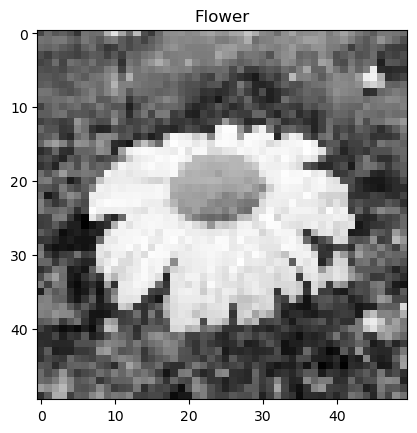

In [65]:
#### ===> 시각화
import matplotlib.pyplot as plt

### 입력 그림 3D => 2D
plt.imshow(grayTensor.squeeze(), cmap='gray')
plt.title('Flower')
plt.show()

In [77]:
### 첫번째 Conv2D Layer 추출 피쳐맵
def print_featuremap(fm_tensor, cols):
    for idx in range(fm_tensor.shape[0]):
        plt.subplot(1,cols,idx+1)
        plt.imshow(fm_tensor[idx].detach().numpy(), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

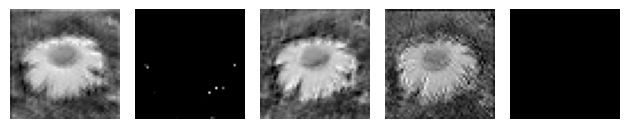

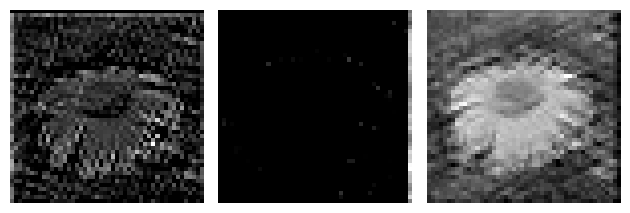

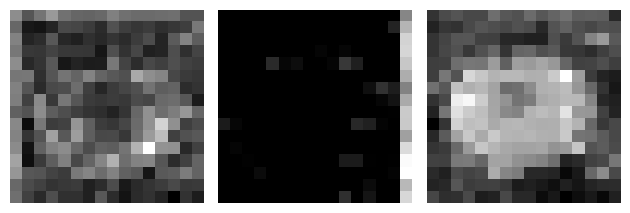

In [78]:
print_featuremap(relu1, 5)
print_featuremap(relu2, 3)
print_featuremap(mp1, 3)